# Modelo predictivo de factores relacionados para el reingreso de pacientes al area hospitalaria
- La finalidad del proyecto es conocer los factores que impactan directamente a la probabilidad de que un paciente reingrese al area hospitalaria una vez que este mismo fue dado de alta.

Integrantes: Alejandro Silva, Fabiola Fragoso, Danny Palacios, Alejandro Giraldo

Modelo supervisado
Regresión Logistica
Variable Dependiente: 

# 0. Entendimiento del Problema (Negocio)

Justificación: 
- La diabetes es una de las enfermedades más caras en EE.UU.
- El manejo en hospitales es inconsistente.
- Mejor control → menos infecciones, menos crisis, menos readmisión.
- Impacto directo en morbilidad, mortalidad y costos.

Este estudio analizó casi 70,000 hospitalizaciones de pacientes con diabetes en EE.UU. para entender si medir HbA1c (un indicador clave de control glucémico) reduce las readmisiones.

La diabetes es una de las enfermedades más costosas. Los hospitales pierden dinero y calidad cuando los pacientes diabéticos regresan por mala gestión del control glucémico durante su hospitalización.

Muchos hospitales NO miden HbA1c, lo que lleva a: control deficiente, tratamiento arbitrario, más complicaciones, mayores costos por readmisión,peor calidad percibida.

-  Objetivo del hospital / organización. Determinar si medir HbA1c puede:
    - Mejorar el manejo de la diabetes, reducir readmisiones a 30 días, disminuir costos, estandarizar protocolos, mejorar seguridad del paciente.

🎯 Valor de negocio

Si un hospital implementa medición rutinaria de HbA1c: Reduce penalidades por readmisiones (Medicare), mejora la calidad y la acreditación, protege ingresos, mejora resultados clínicos.

Este estudio sirve como “evidencia base” para justificar cambios institucionales.

Preguntas clave:

- ¿Qué factores predicen la readmisión temprana?
- ¿La medición de HbA1c reduce el riesgo de readmisión?
- ¿Qué grupos de pacientes presentan mayor riesgo?

Éxito:

- Modelo con capacidad predictiva aceptable.
- Identificación de variables clave que soporten decisiones clínicas.
- Propuestas para mejorar protocolos hospitalarios.

### 1. Comprensión de los Datos
- Origen de los datos: Health Facts database (Cerner)
- Contiene 101,766 observaciones y 50 variables.
- El data set se encontró en kaggle y en UC Irvine Machine Learning Repository :
    - https://www.kaggle.com/datasets/brandao/diabetes
    - https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- Recopila datos de 130 hospitales en Estados Unidos durante 10 años (1999–2008).
- Resumen: 
    Este dataset contiene información de 10 años de hospitalizaciones de pacientes diabéticos. El objetivo es predecir si un paciente será readmitido dentro de 30 días. El problema es clave porque el manejo deficiente de la diabetes en hospitales provoca más complicaciones, mayores costos y peores resultados clínicos.
- La descripción y los valores de las variables pueden encontrarse en el artículo de investigación.
    - https://onlinelibrary.wiley.com/doi/10.1155/2014/781670
- Qué representa cada fila:
    -   Una hospitalización con:
        - Laboratorios
        - Medicamentos administrados
        - Diagnósticos ICD9
        - Tiempo de estancia (1–14 días)

    - Variable objetivo (target): Readmisión a 30 días (Sí/No).
    - Variables principales incluidas: 
        - Demografía (edad, raza, género)
        - Diagnósticos (primario y secundarios)
        - Tipo de ingreso y egreso
        - Número de procedimientos y medicamentos
        - Pruebas de glucosa y HbA1c
        - Cambios de medicación
        - Visitas previas

#### Features:
- encounter_ID (ID del encuentro)
- patient_nbr = (Número de paciente)
- race = (Raza)
- gender = (Género)
- age = (Edad)
- weight = (Peso)
- admission_type_id = (Tipo de admisión)
- discharge_disposition_id = (Destino al alta)
- admission_source_id = (Fuente de admisión)
- time_in_hospital = (Tiempo en hospital)
- payer_code = (Código de pagador)
- medical_specialty = (Especialidad médica)
- num_lab_procedures = (Número de procedimientos de laboratorio)
- num_procedures = (Número de procedimientos)
- num_medications = (Número de medicamentos)
- number_outpatient = (Número de visitas ambulatorias)
- number_emergency = (Número de visitas de emergencia)
- number_inpatient = (Número de visitas hospitalarias)
- diag_1 = (Diagnóstico 1)
- diag_2 = (Diagnóstico 2)
- diag_3 = (Diagnóstico 3)
- number_diagnoses = (Número de diagnósticos)
- max_glu_serum = (Resultado de prueba de glucosa en suero)
- A1Cresult = (Resultado de prueba A1c)
- change= (Cambio de medicamentos)
- diabetesMed = (Medicamentos para diabetes)

- 24 features for medications (24 características para medicamentos):

Específicamente: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, y metformin-pioglitazone.
- readmitted = Variable objetivo:
- - NO: Si el paciente no fue readmitdo
- - >30: Si el paciente fue readmitido despues de 30 dias.
- - < 30: Si el paciente fue readmitido en menos de 30 dias. Clasificaria como 'SI'

### Carga y Exploración de datos

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brandao/diabetes")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
import pandas as pd

data = pd.read_csv('../data/raw/diabetic_data.csv')

data.head()   #ver rapidamente si cargo el dataset 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
data['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [8]:
### Estadisticas principales variables numericas

print(data.info()) # ves tipos de datos, valores nulos y memoria usada, todo de un vistazo.  int64(13), object(37)

print(data.describe()) # ESTADISTICAS de cada columna,



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

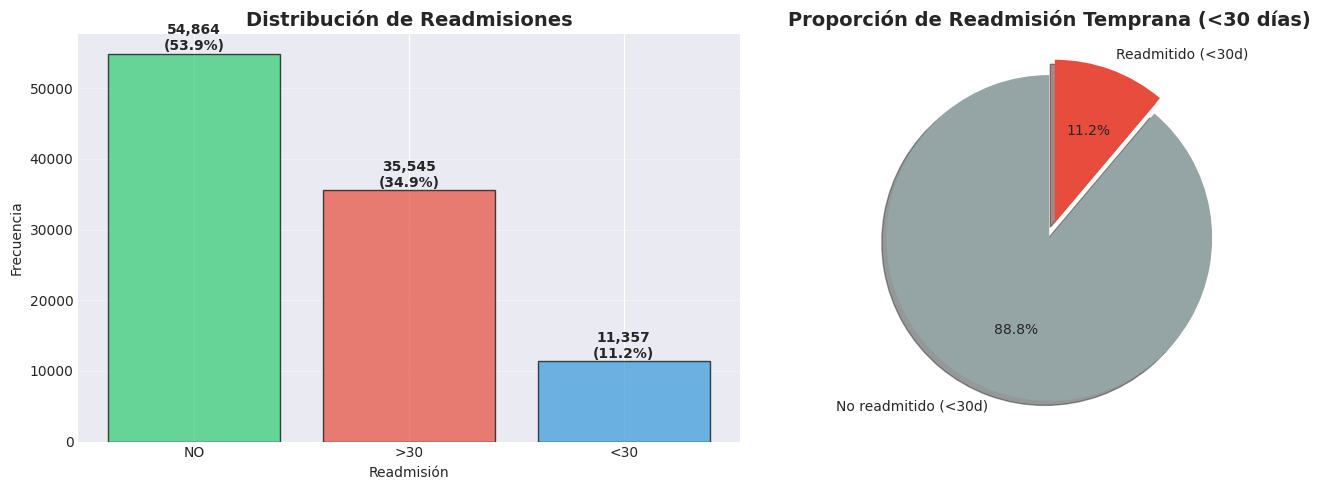

In [10]:
### Graficas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# =============================================================================
# 1. ANÁLISIS DE LA VARIABLE OBJETIVO
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Distribución de readmisión
readmit_counts = data['readmitted'].value_counts()
colors = ['#2ecc71', '#e74c3c', '#3498db']
axes[0].bar(readmit_counts.index, readmit_counts.values, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Readmisiones', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Readmisión')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(readmit_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(data)*100:.1f}%)', 
                ha='center', fontweight='bold')

# Gráfica 2: Variable binaria (<30 días = readmisión)
data['readmit_binary'] = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
binary_counts = data['readmit_binary'].value_counts()
axes[1].pie(binary_counts.values, labels=['No readmitido (<30d)', 'Readmitido (<30d)'], 
           autopct='%1.1f%%', colors=['#95a5a6', '#e74c3c'], startangle=90,
           explode=(0, 0.1), shadow=True)
axes[1].set_title('Proporción de Readmisión Temprana (<30 días)', 
                 fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/01_variable_objetivo.png', dpi=300, bbox_inches='tight')
plt.show()

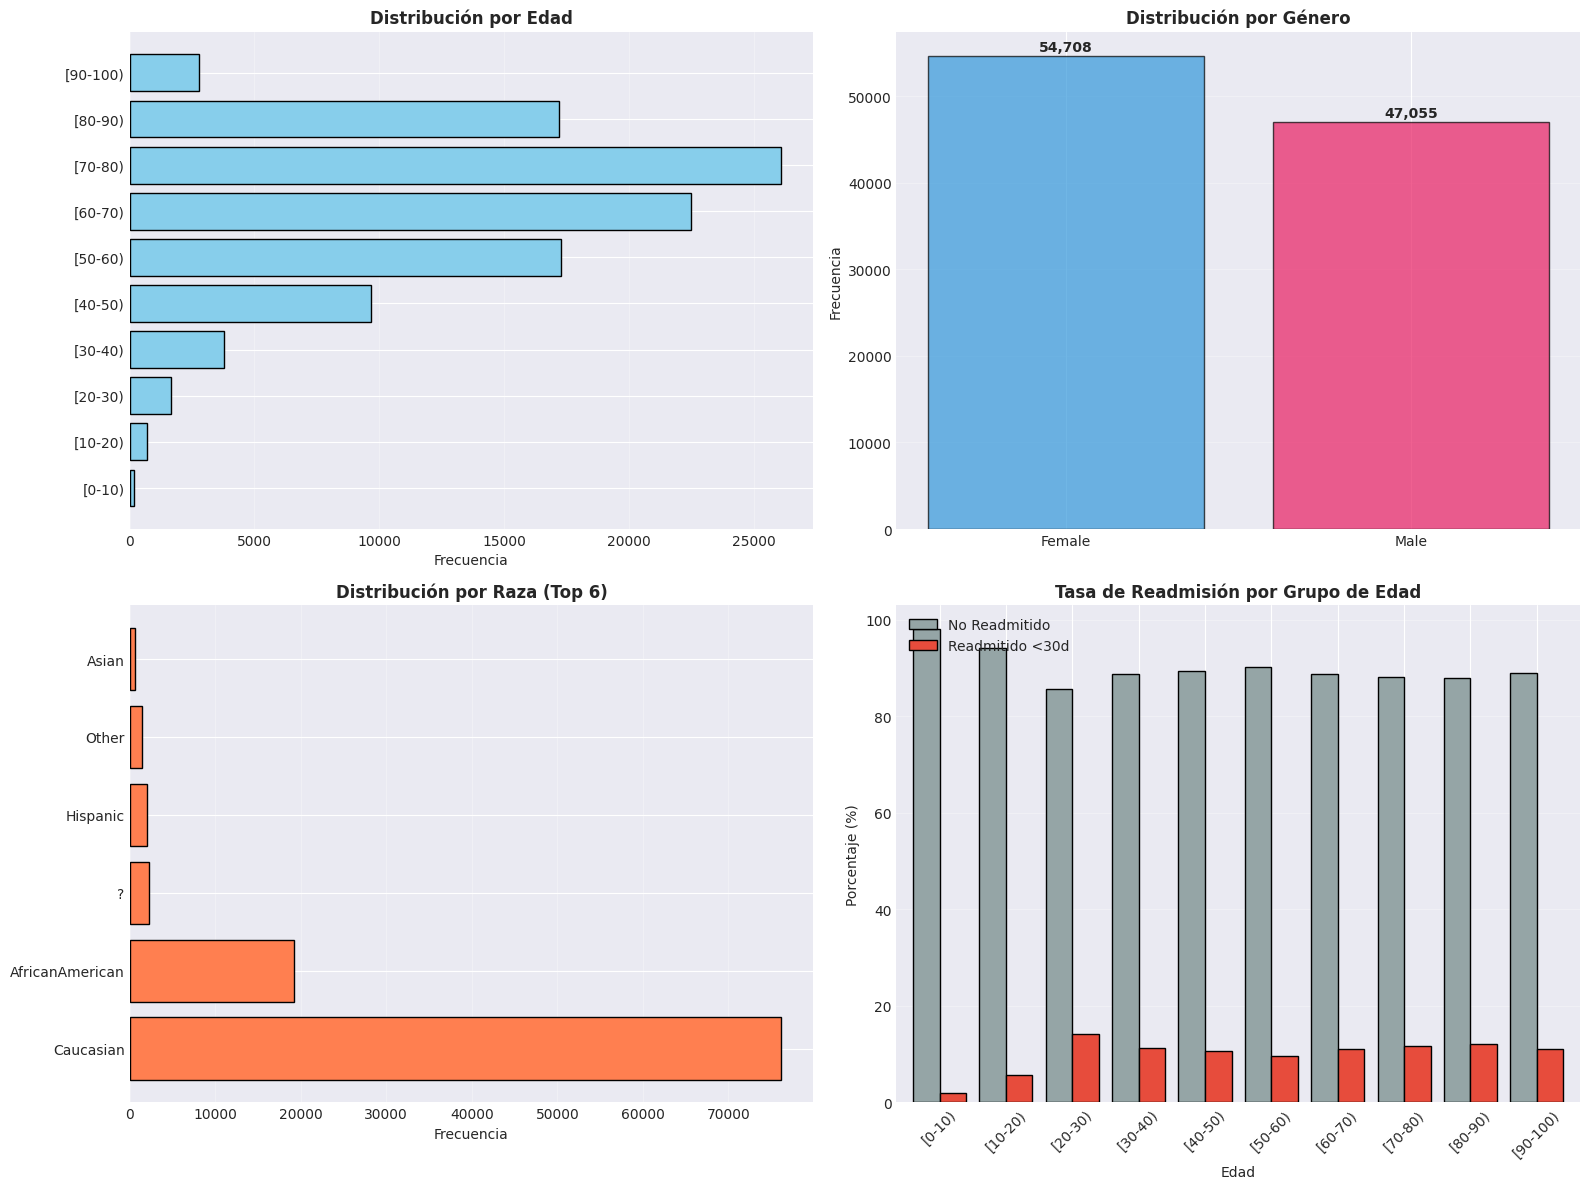

In [11]:
# =============================================================================
# 2. VARIABLES DEMOGRÁFICAS
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Edad
age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', 
             '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
age_counts = data['age'].value_counts().reindex(age_order, fill_value=0)
axes[0, 0].barh(age_order, age_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución por Edad', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Frecuencia')
axes[0, 0].grid(axis='x', alpha=0.3)

# Género
gender_data = data[data['gender'].isin(['Male', 'Female'])]['gender'].value_counts()
axes[0, 1].bar(gender_data.index, gender_data.values, 
              color=['#3498db', '#e91e63'], edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribución por Género', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(gender_data.values):
    axes[0, 1].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Raza
race_counts = data['race'].value_counts().head(6)
axes[1, 0].barh(race_counts.index, race_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Distribución por Raza (Top 6)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Frecuencia')
axes[1, 0].grid(axis='x', alpha=0.3)

# Edad vs Readmisión
age_readmit = pd.crosstab(data['age'], data['readmit_binary'], normalize='index') * 100
age_readmit = age_readmit.reindex(age_order, fill_value=0)
age_readmit.plot(kind='bar', ax=axes[1, 1], color=['#95a5a6', '#e74c3c'], 
                edgecolor='black', width=0.8)
axes[1, 1].set_title('Tasa de Readmisión por Grupo de Edad', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Edad')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].legend(['No Readmitido', 'Readmitido <30d'], loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/02_demograficos.png', dpi=300, bbox_inches='tight')
plt.show()

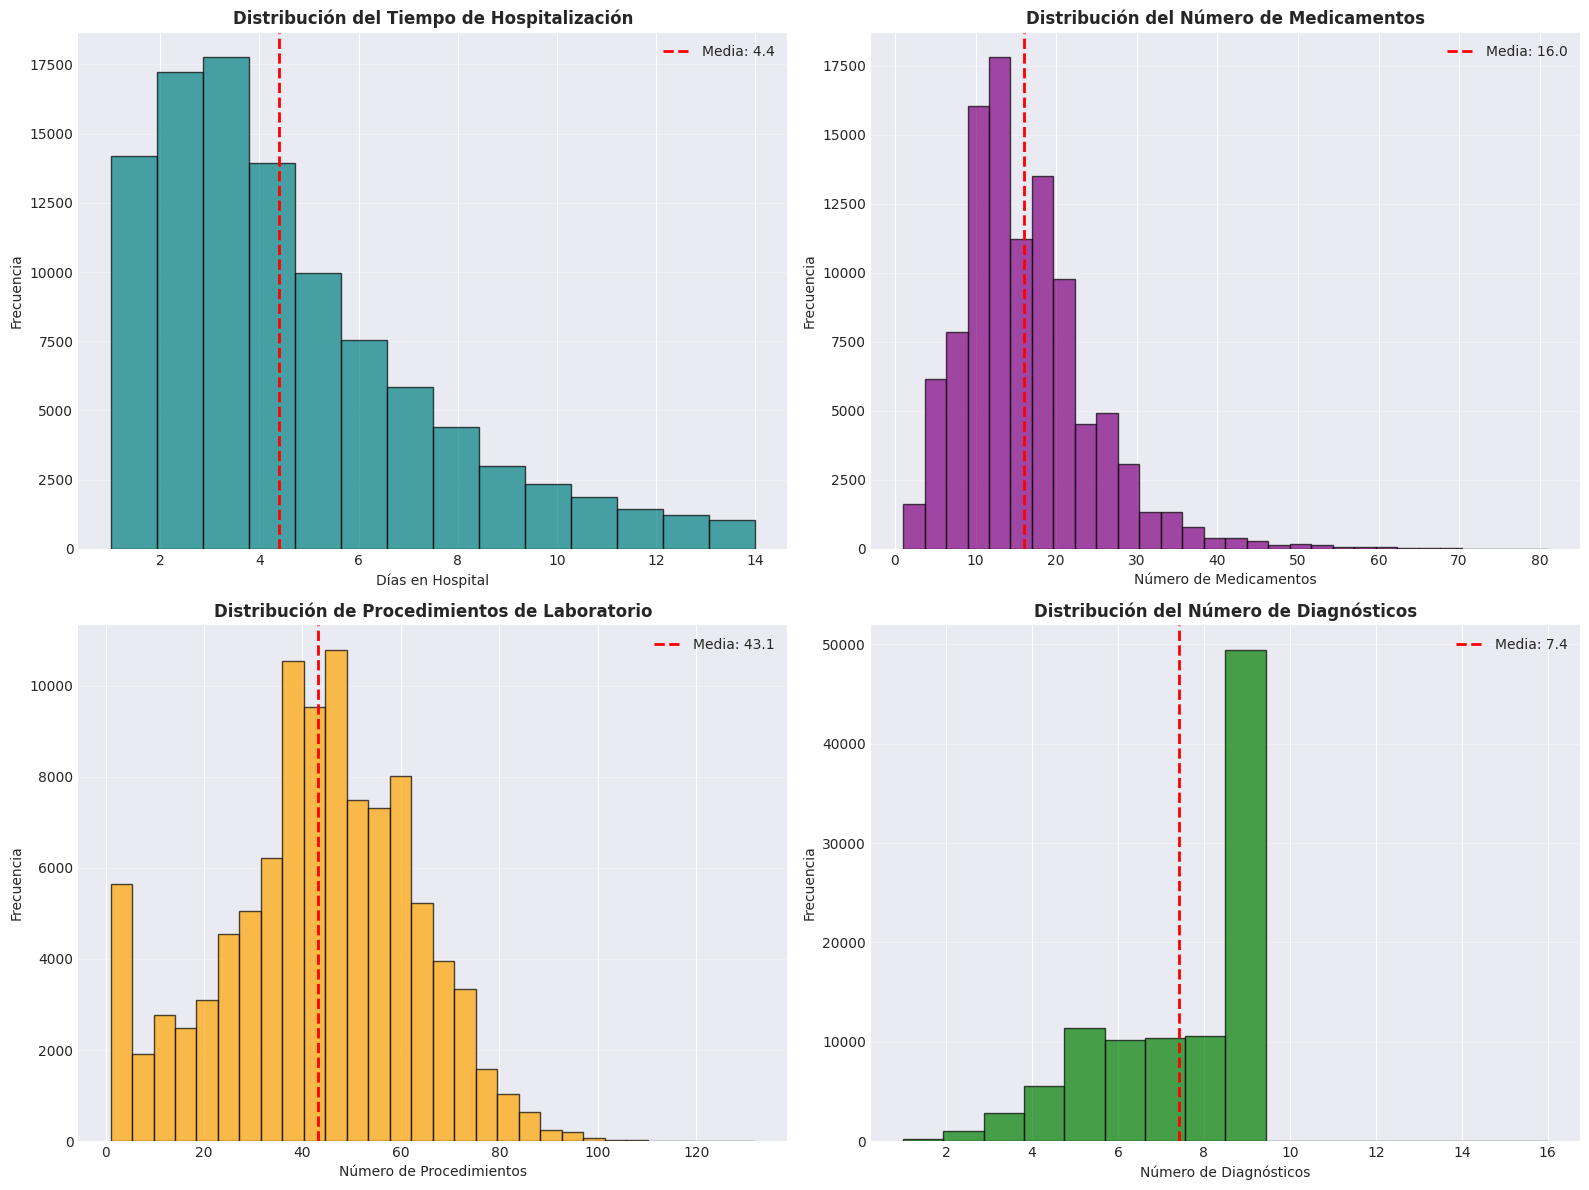

In [12]:
# =============================================================================
# 3. VARIABLES CLÍNICAS CLAVE
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Tiempo en hospital
axes[0, 0].hist(data['time_in_hospital'], bins=14, color='teal', 
               edgecolor='black', alpha=0.7)
axes[0, 0].axvline(data['time_in_hospital'].mean(), color='red', 
                  linestyle='--', linewidth=2, label=f'Media: {data["time_in_hospital"].mean():.1f}')
axes[0, 0].set_title('Distribución del Tiempo de Hospitalización', 
                    fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Días en Hospital')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Número de medicamentos
axes[0, 1].hist(data['num_medications'], bins=30, color='purple', 
               edgecolor='black', alpha=0.7)
axes[0, 1].axvline(data['num_medications'].mean(), color='red', 
                  linestyle='--', linewidth=2, label=f'Media: {data["num_medications"].mean():.1f}')
axes[0, 1].set_title('Distribución del Número de Medicamentos', 
                    fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Número de Medicamentos')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Procedimientos de laboratorio
axes[1, 0].hist(data['num_lab_procedures'], bins=30, color='orange', 
               edgecolor='black', alpha=0.7)
axes[1, 0].axvline(data['num_lab_procedures'].mean(), color='red', 
                  linestyle='--', linewidth=2, label=f'Media: {data["num_lab_procedures"].mean():.1f}')
axes[1, 0].set_title('Distribución de Procedimientos de Laboratorio', 
                    fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Número de Procedimientos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Número de diagnósticos
axes[1, 1].hist(data['number_diagnoses'], bins=16, color='green', 
               edgecolor='black', alpha=0.7)
axes[1, 1].axvline(data['number_diagnoses'].mean(), color='red', 
                  linestyle='--', linewidth=2, label=f'Media: {data["number_diagnoses"].mean():.1f}')
axes[1, 1].set_title('Distribución del Número de Diagnósticos', 
                    fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Número de Diagnósticos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/03_variables_clinicas.png', dpi=300, bbox_inches='tight')
plt.show()

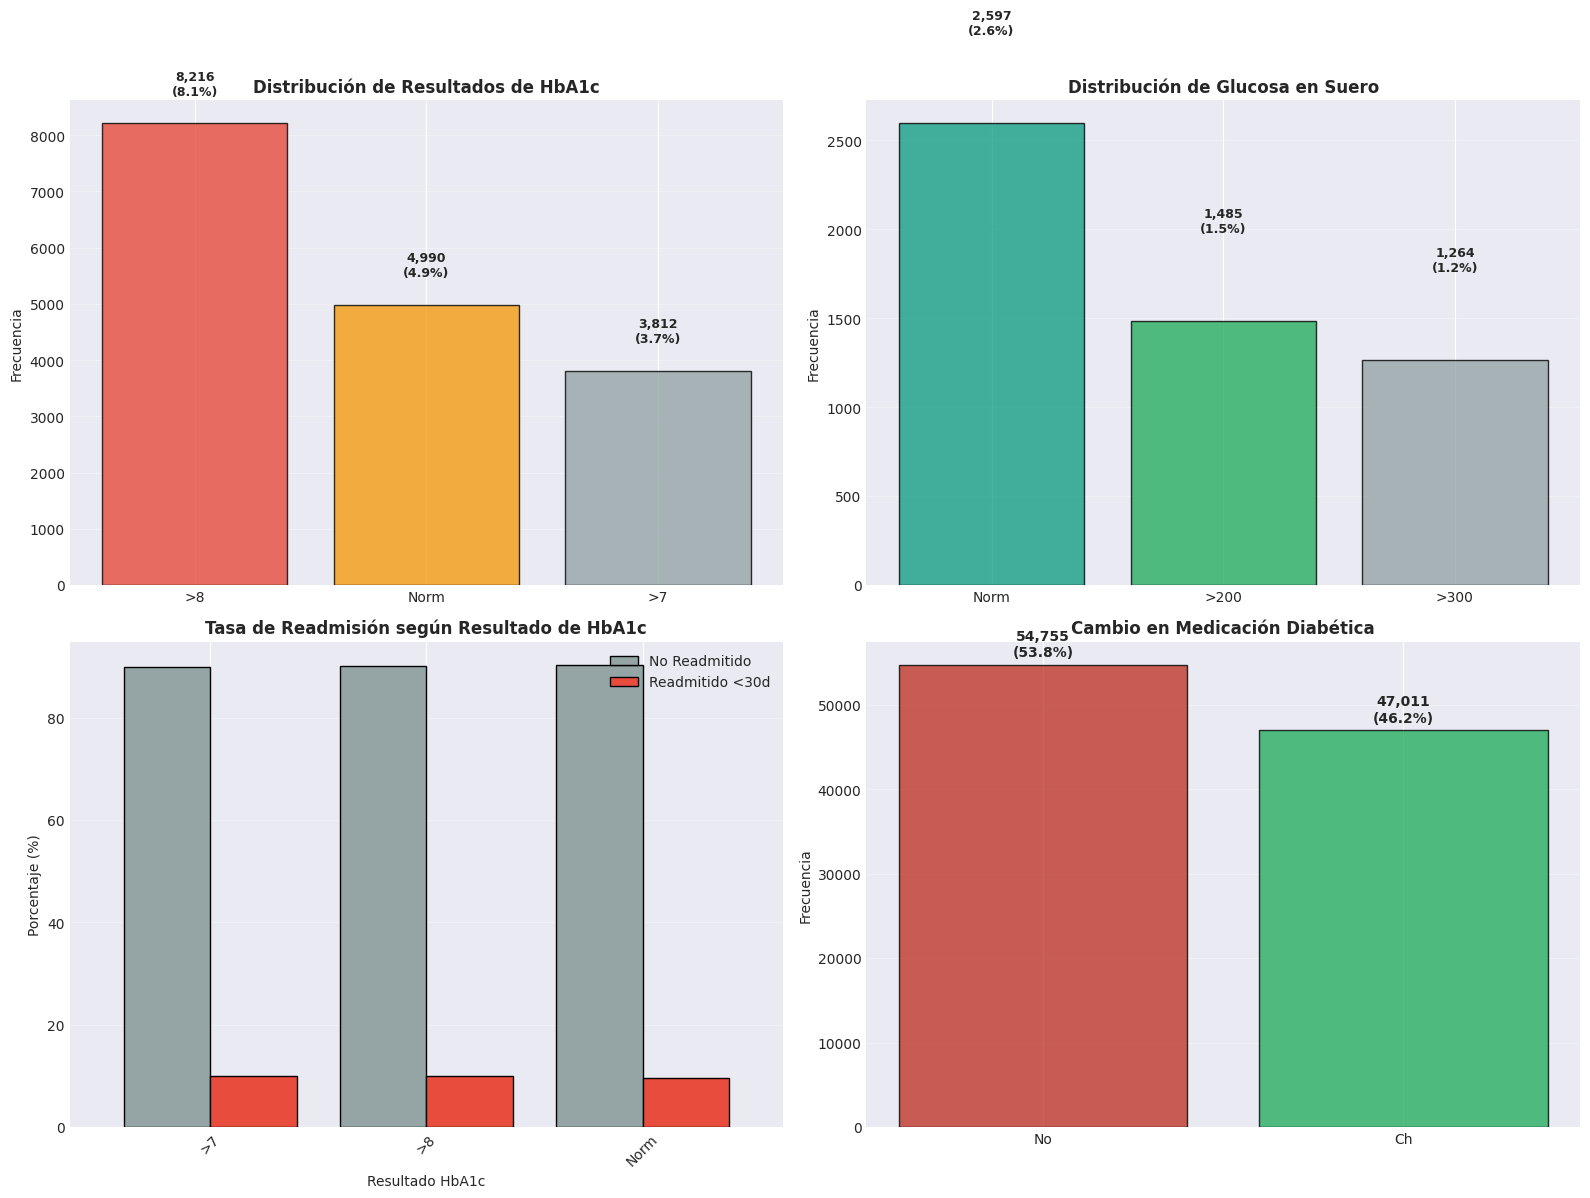

In [13]:
# =============================================================================
# 4. ANÁLISIS DE HbA1c Y GLUCOSA (VARIABLES CLAVE DEL ESTUDIO)
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A1C Result
a1c_counts = data['A1Cresult'].value_counts()
axes[0, 0].bar(a1c_counts.index, a1c_counts.values, 
              color=['#e74c3c', '#f39c12', '#95a5a6', '#3498db'], 
              edgecolor='black', alpha=0.8)
axes[0, 0].set_title('Distribución de Resultados de HbA1c', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(axis='y', alpha=0.3)
for i, (idx, v) in enumerate(a1c_counts.items()):
    axes[0, 0].text(i, v + 500, f'{v:,}\n({v/len(data)*100:.1f}%)', 
                   ha='center', fontweight='bold', fontsize=9)

# Glucosa en suero
glucose_counts = data['max_glu_serum'].value_counts()
axes[0, 1].bar(glucose_counts.index, glucose_counts.values, 
              color=['#16a085', '#27ae60', '#95a5a6', '#2980b9'], 
              edgecolor='black', alpha=0.8)
axes[0, 1].set_title('Distribución de Glucosa en Suero', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, (idx, v) in enumerate(glucose_counts.items()):
    axes[0, 1].text(i, v + 500, f'{v:,}\n({v/len(data)*100:.1f}%)', 
                   ha='center', fontweight='bold', fontsize=9)

# A1C vs Readmisión
a1c_readmit = pd.crosstab(data['A1Cresult'], data['readmit_binary'], normalize='index') * 100
a1c_readmit.plot(kind='bar', ax=axes[1, 0], color=['#95a5a6', '#e74c3c'], 
                edgecolor='black', width=0.8)
axes[1, 0].set_title('Tasa de Readmisión según Resultado de HbA1c', 
                    fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Resultado HbA1c')
axes[1, 0].set_ylabel('Porcentaje (%)')
axes[1, 0].legend(['No Readmitido', 'Readmitido <30d'], loc='upper right')
axes[1, 0].grid(axis='y', alpha=0.3)
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)

# Cambio de medicación
change_counts = data['change'].value_counts()
axes[1, 1].bar(change_counts.index, change_counts.values, 
              color=['#c0392b', '#27ae60'], edgecolor='black', alpha=0.8)
axes[1, 1].set_title('Cambio en Medicación Diabética', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(axis='y', alpha=0.3)
for i, (idx, v) in enumerate(change_counts.items()):
    axes[1, 1].text(i, v + 1000, f'{v:,}\n({v/len(data)*100:.1f}%)', 
                   ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/04_hba1c_glucosa.png', dpi=300, bbox_inches='tight')
plt.show()

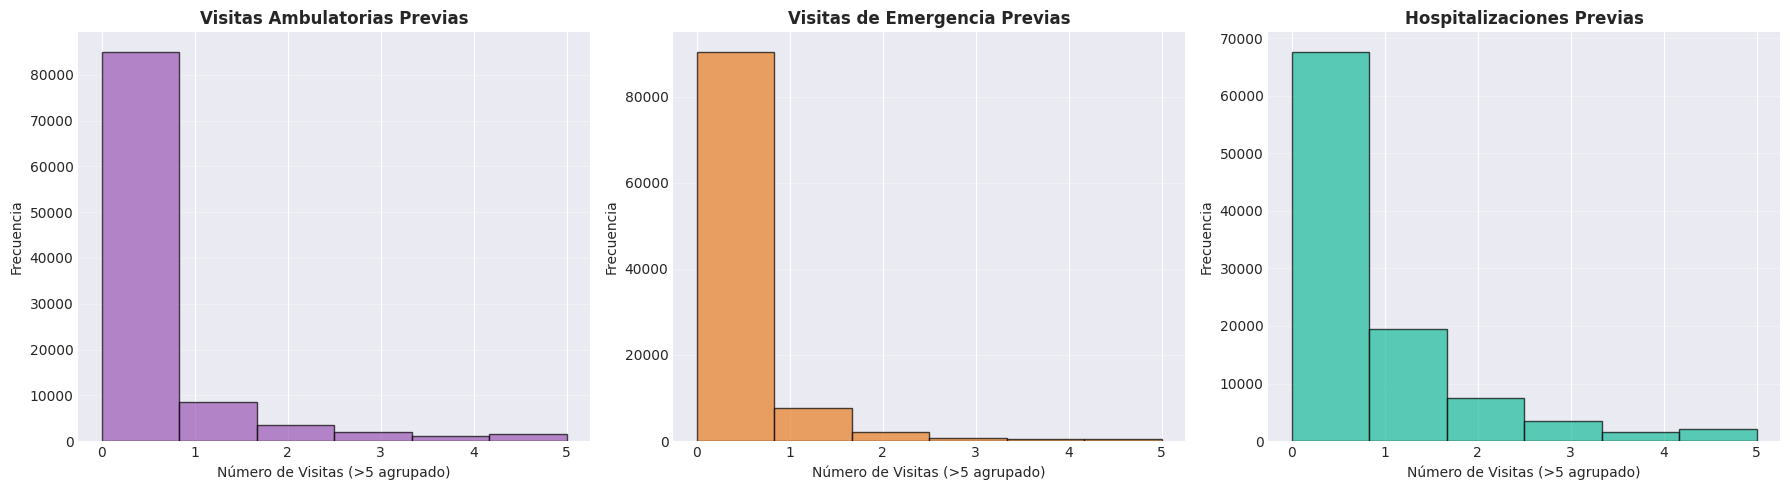

In [14]:
# =============================================================================
# 5. VISITAS PREVIAS
# =============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Visitas ambulatorias
axes[0].hist(data['number_outpatient'].clip(upper=5), bins=6, 
            color='#9b59b6', edgecolor='black', alpha=0.7)
axes[0].set_title('Visitas Ambulatorias Previas', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de Visitas (>5 agrupado)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.3)

# Visitas de emergencia
axes[1].hist(data['number_emergency'].clip(upper=5), bins=6, 
            color='#e67e22', edgecolor='black', alpha=0.7)
axes[1].set_title('Visitas de Emergencia Previas', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Número de Visitas (>5 agrupado)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', alpha=0.3)

# Visitas hospitalarias
axes[2].hist(data['number_inpatient'].clip(upper=5), bins=6, 
            color='#1abc9c', edgecolor='black', alpha=0.7)
axes[2].set_title('Hospitalizaciones Previas', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Número de Visitas (>5 agrupado)')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/05_visitas_previas.png', dpi=300, bbox_inches='tight')
plt.show()

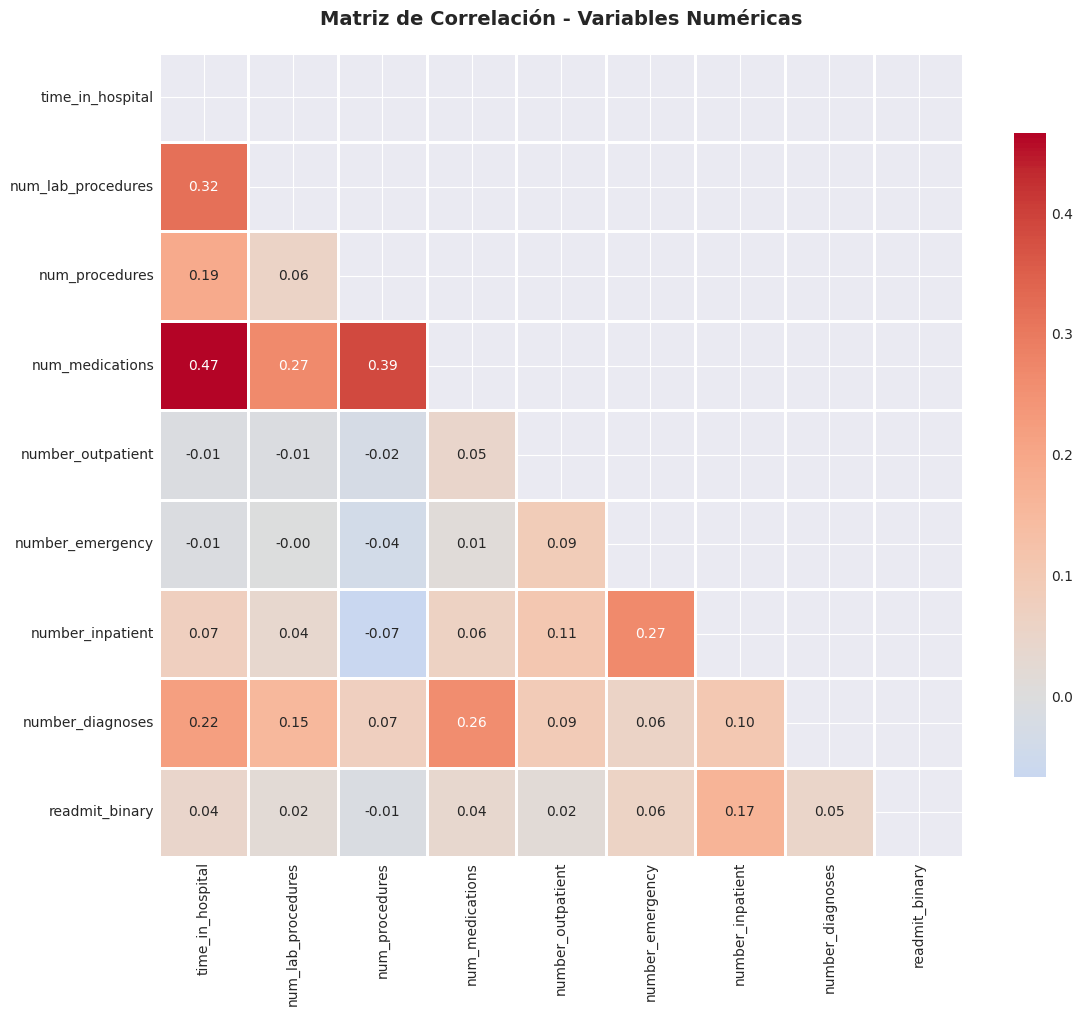

In [15]:
# =============================================================================
# 6. CORRELACIÓN DE VARIABLES NUMÉRICAS
# =============================================================================

numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                'num_medications', 'number_outpatient', 'number_emergency', 
                'number_inpatient', 'number_diagnoses', 'readmit_binary']

correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
           cmap='coolwarm', center=0, square=True, linewidths=1,
           cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/06_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

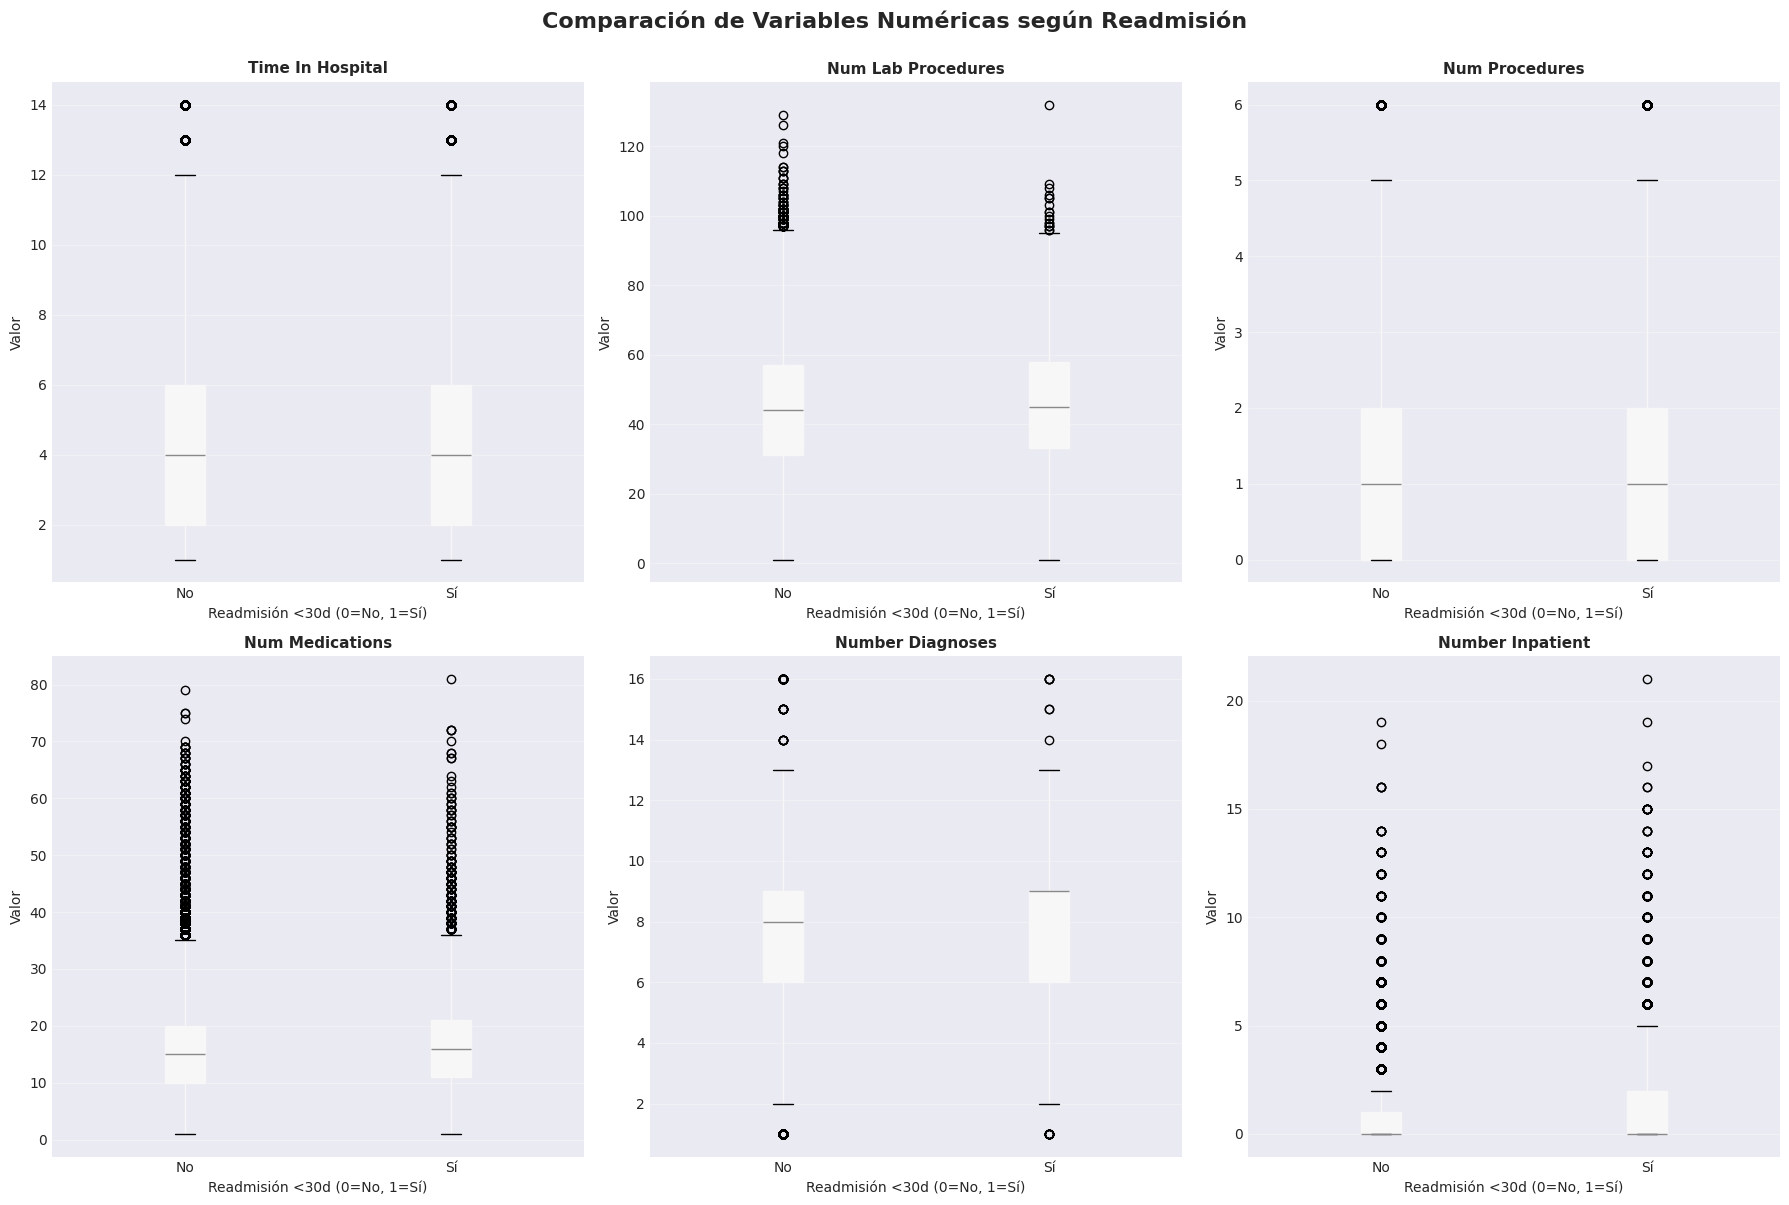

In [16]:
# =============================================================================
# 7. BOXPLOTS: VARIABLES NUMÉRICAS VS READMISIÓN
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                   'num_medications', 'number_diagnoses', 'number_inpatient']

for i, col in enumerate(numeric_features):
    data.boxplot(column=col, by='readmit_binary', ax=axes[i], 
                patch_artist=True, grid=False)
    axes[i].set_title(f'{col.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Readmisión <30d (0=No, 1=Sí)')
    axes[i].set_ylabel('Valor')
    axes[i].grid(axis='y', alpha=0.3)
    plt.sca(axes[i])
    plt.xticks([1, 2], ['No', 'Sí'])

plt.suptitle('Comparación de Variables Numéricas según Readmisión', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('../reports/figures/07_boxplots_readmision.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# =============================================================================
# 8. RESUMEN ESTADÍSTICO
# =============================================================================

print("="*80)
print("RESUMEN ESTADÍSTICO DEL DATASET")
print("="*80)
print(f"\nTotal de registros: {len(data):,}")
print(f"Total de variables: {len(data.columns)}")
print(f"\nTasa de readmisión <30 días: {data['readmit_binary'].mean()*100:.2f}%")
print(f"Tasa de readmisión >30 días: {(data['readmitted']=='>30').mean()*100:.2f}%")
print(f"Tasa sin readmisión: {(data['readmitted']=='NO').mean()*100:.2f}%")
print("\n" + "="*80)

RESUMEN ESTADÍSTICO DEL DATASET

Total de registros: 101,766
Total de variables: 51

Tasa de readmisión <30 días: 11.16%
Tasa de readmisión >30 días: 34.93%
Tasa sin readmisión: 53.91%



### Preparación y Limpieza de datos



🔍 ANÁLISIS DE CALIDAD DE DATOS Y DETECCIÓN DE OUTLIERS

📊 1. ANÁLISIS DE VALORES FALTANTES Y DATOS INVÁLIDOS

⚠️  VARIABLES CON VALORES FALTANTES:
         Variable  Valores_Faltantes  Porcentaje   Tipo
           weight              98569   96.858479 object
    max_glu_serum              96420   94.746772 object
        A1Cresult              84748   83.277322 object
medical_specialty              49949   49.082208 object
       payer_code              40256   39.557416 object
             race               2273    2.233555 object
           diag_3               1423    1.398306 object
           diag_2                358    0.351787 object
           diag_1                 21    0.020636 object
           gender                  3    0.002948 object


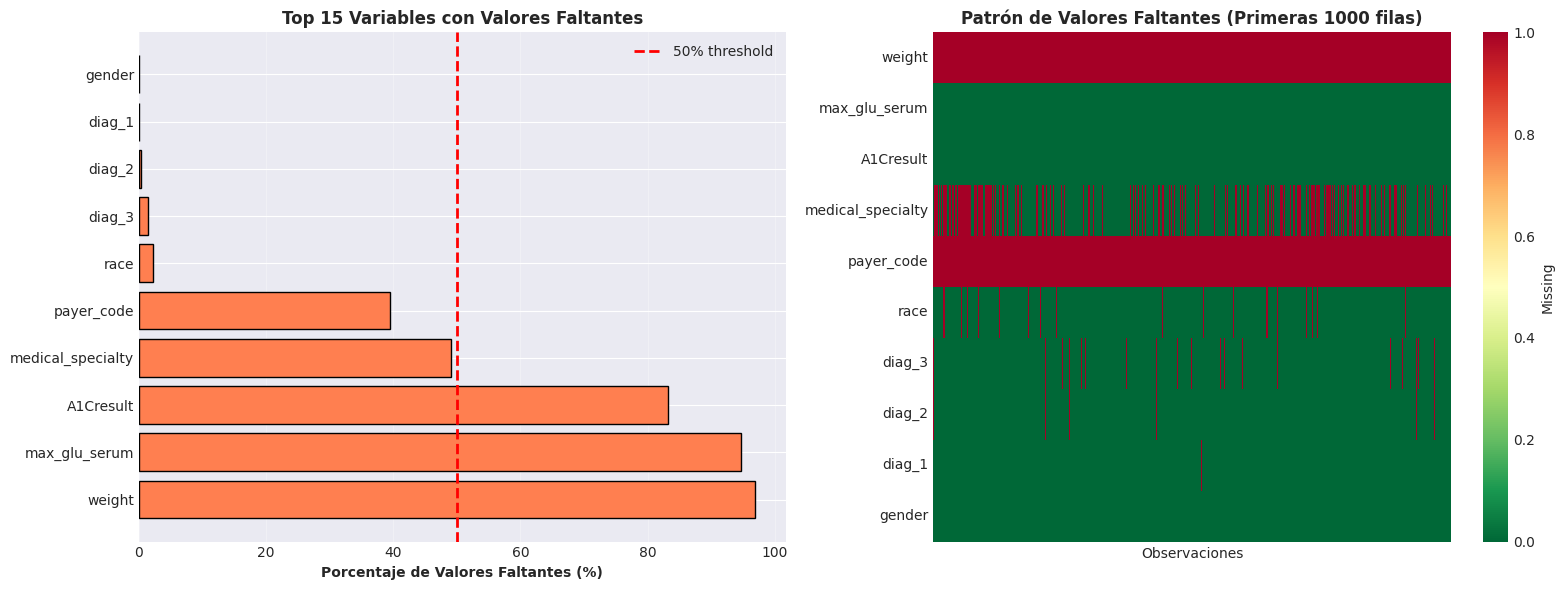


📊 2. ANÁLISIS DE DUPLICADOS

🔹 Filas completamente duplicadas: 0
🔹 Pacientes únicos: 71,518
🔹 Total de encuentros: 101,766
🔹 Pacientes con múltiples encuentros: 30,248
🔹 Promedio de encuentros por paciente: 1.42


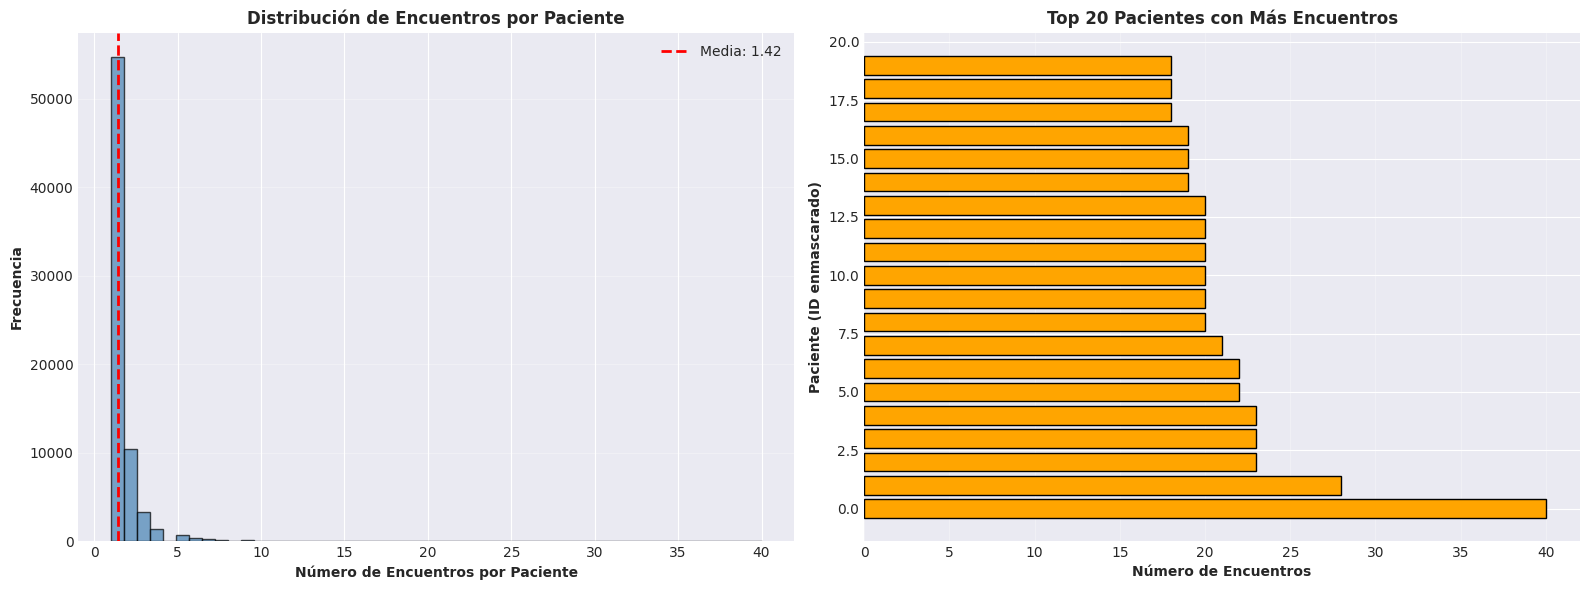


📊 3. DETECCIÓN DE OUTLIERS EN VARIABLES NUMÉRICAS

⚠️  RESUMEN DE OUTLIERS POR VARIABLE:
          Variable  Min       Max        Media  Outliers_IQR  Outliers_IQR_%  Outliers_Z_%
 number_outpatient    0        42 3.693572e-01         16739       16.448519      1.431716
  number_emergency    0        76 1.978362e-01         11383       11.185465      1.635124
    readmit_binary    0         1 1.115992e-01         11357       11.159916      0.000000
  number_inpatient    0        21 6.355659e-01          7049        6.926675      1.981015
    num_procedures    0         6 1.339730e+00          4954        4.868031      0.000000
   num_medications    1        81 1.602184e+01          2557        2.512627      1.337382
  time_in_hospital    1        14 4.395987e+00          2252        2.212920      1.023918
  number_diagnoses    1        16 7.422607e+00           281        0.276124      0.276124
       patient_nbr  135 189502619 5.433040e+07           247        0.242714      0.832302


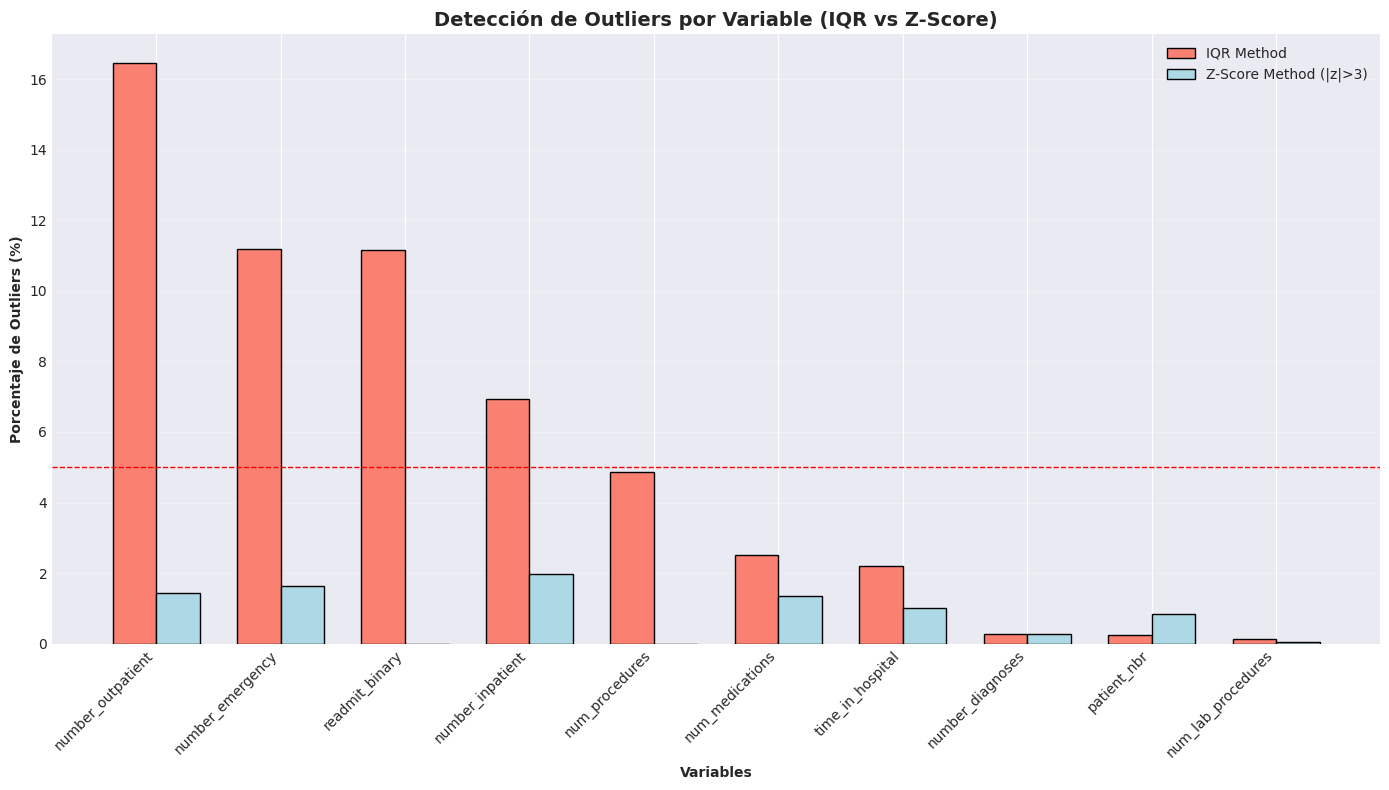


📊 4. VISUALIZACIÓN DETALLADA DE OUTLIERS


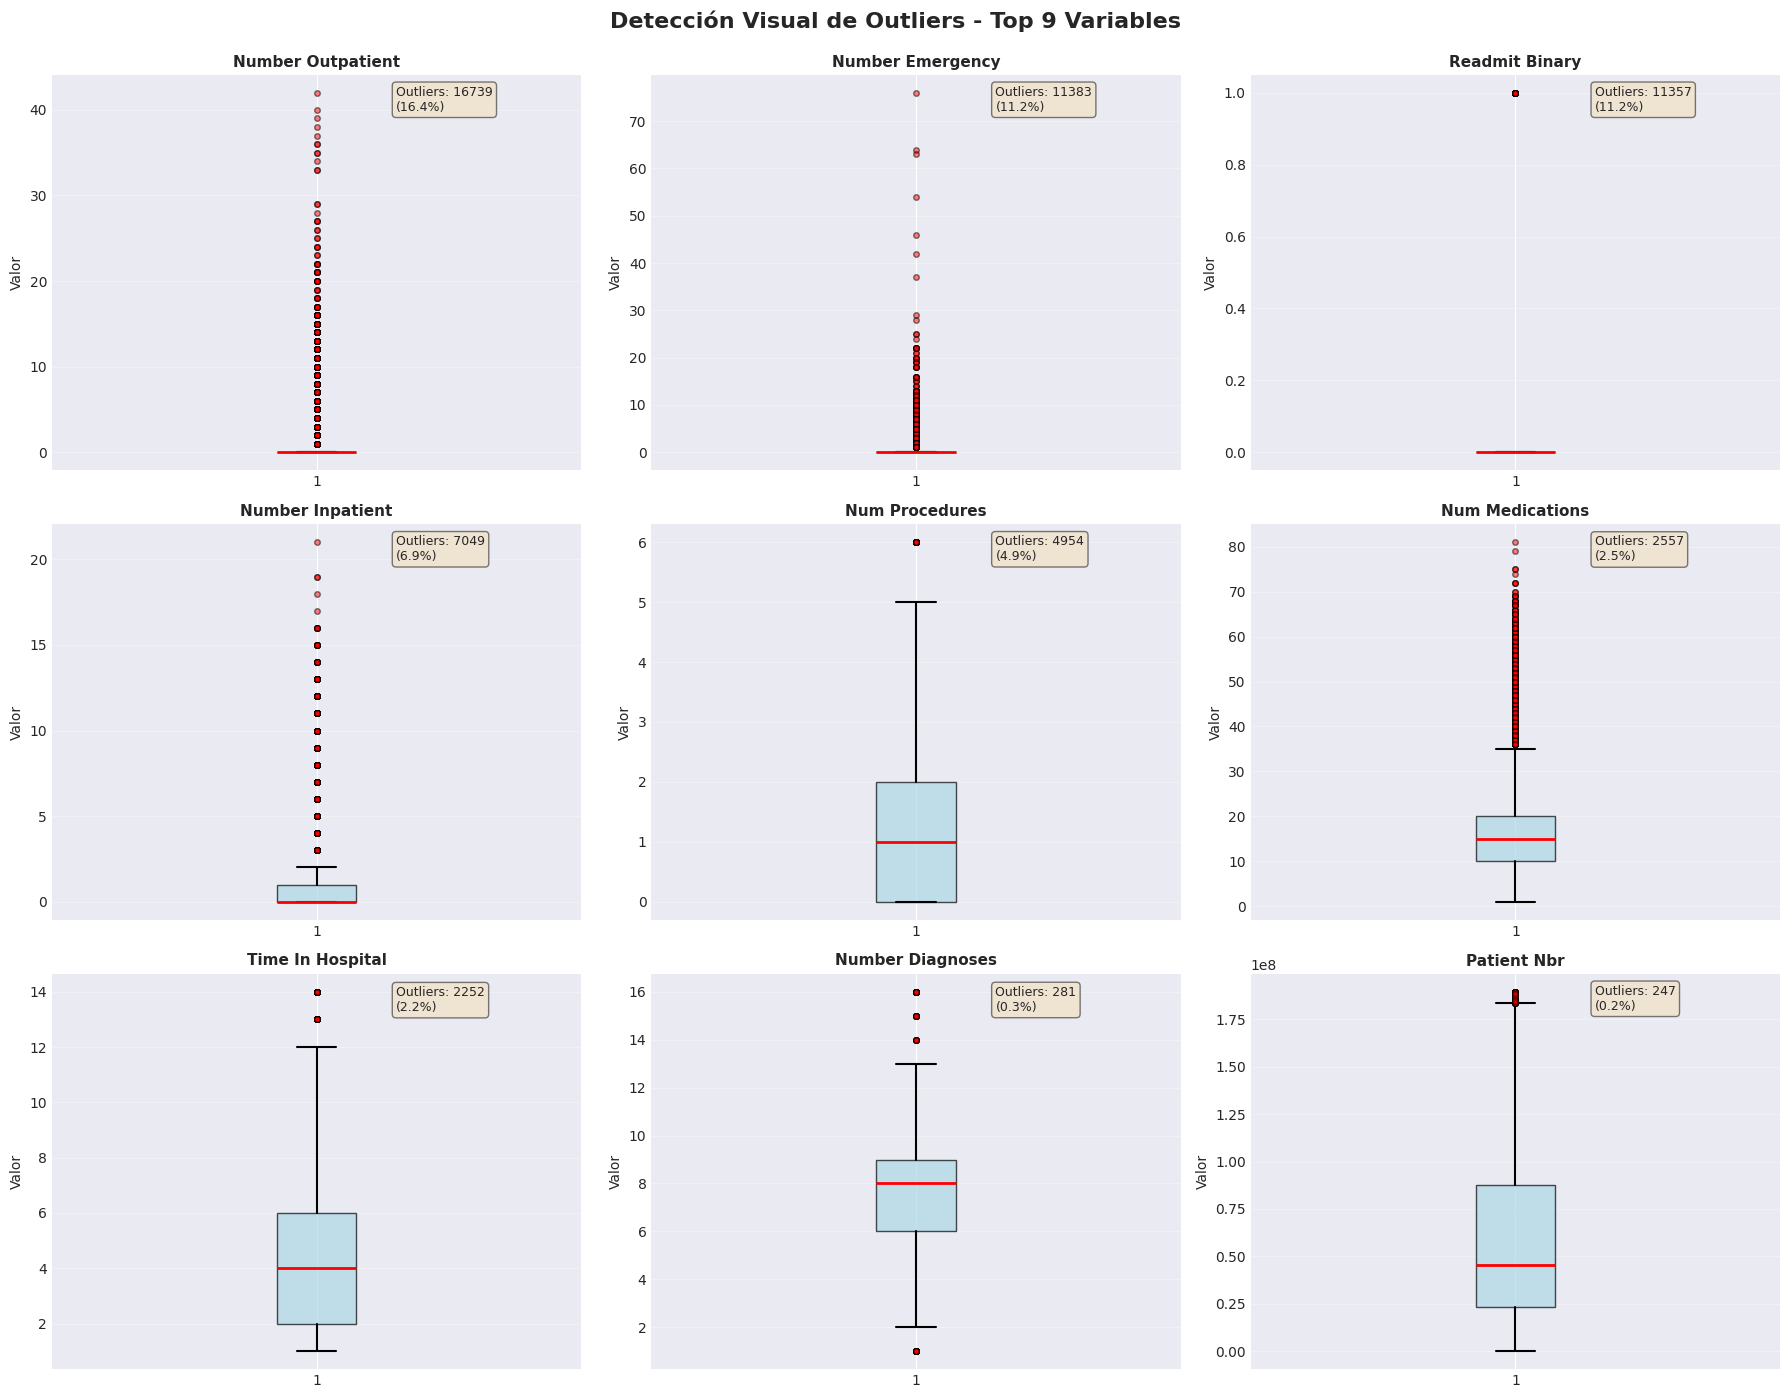


📊 5. ANÁLISIS DE DISTRIBUCIONES Y NORMALIDAD


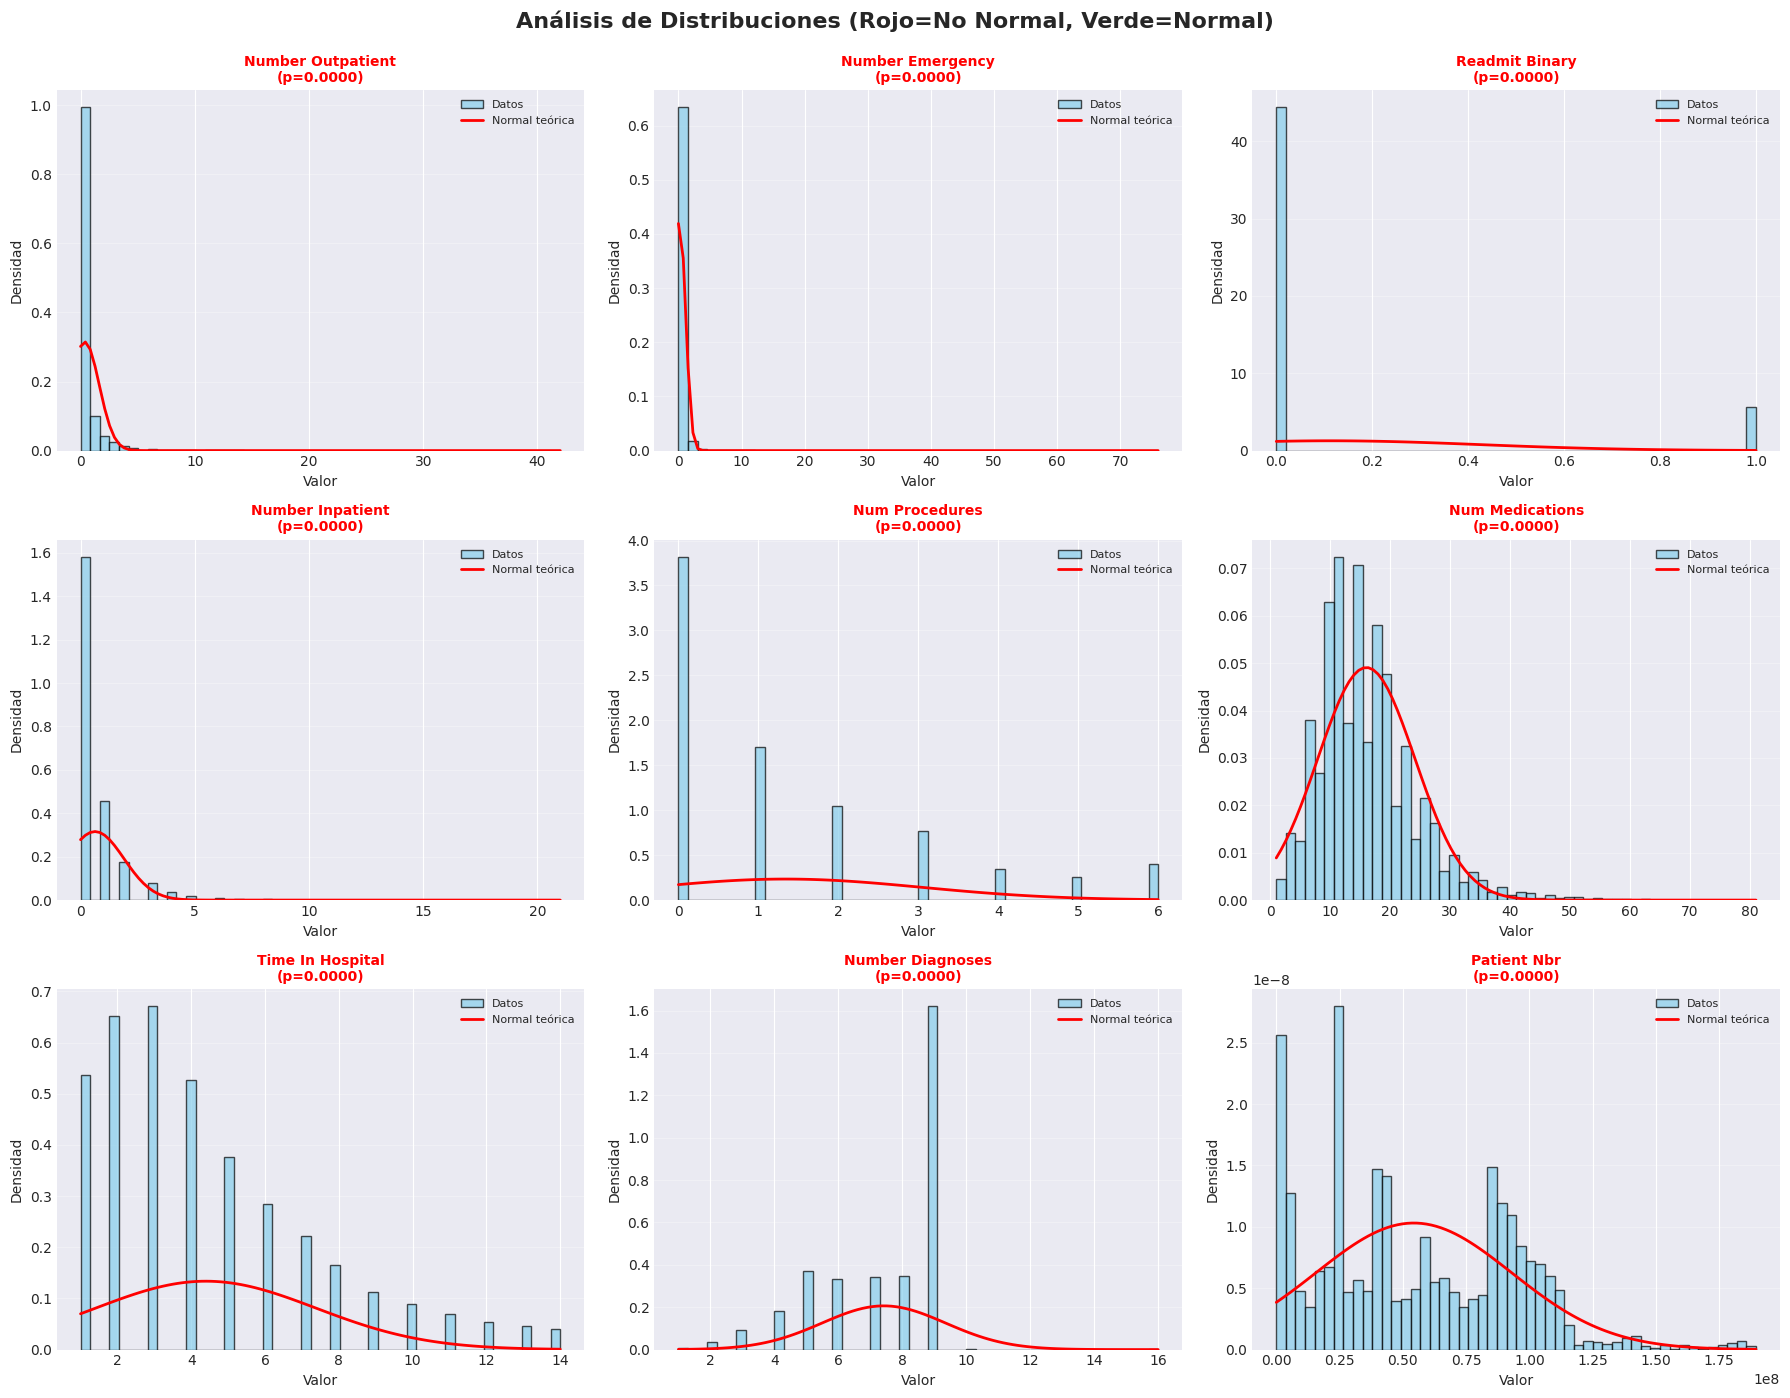


📊 6. VALORES EXTREMOS E INCONSISTENCIAS LÓGICAS

✅ No se detectaron valores extremos según criterios establecidos

📊 7. ANÁLISIS DE CARDINALIDAD

🔹 VARIABLES DE ALTA CARDINALIDAD (>50% valores únicos):
    Variable  Valores_Únicos  Cardinalidad_%
encounter_id          101766       100.00000
 patient_nbr           71518        70.27691

🔹 VARIABLES DE BAJA VARIANZA (un valor representa >90%):
                Variable  Valores_Únicos  Valor_Más_Común_%
                  weight              10          96.858479
           rosiglitazone               4          93.745455
             nateglinide               4          99.309200
             repaglinide               4          98.487707
             glimepiride               4          94.899082
          chlorpropamide               4          99.915492
     glyburide-metformin               4          99.306252
            pioglitazone               4          92.799167
                miglitol               4          99.962659
    

In [ ]:
print("="*100)
print("🔍 ANÁLISIS DE CALIDAD DE DATOS Y DETECCIÓN DE OUTLIERS")
print("="*100)

# =============================================================================
# 1. VALORES FALTANTES Y DATOS INVÁLIDOS
# =============================================================================

print("\n" + "="*100)
print("📊 1. ANÁLISIS DE VALORES FALTANTES Y DATOS INVÁLIDOS")
print("="*100)

# Identificar valores que representan "missing" o "unknown"
missing_indicators = ['?', 'Unknown/Invalid', 'None', 'nan', 'NaN', '']

# Contar valores faltantes por columna
missing_data = []
for col in data.columns:
    # Contar nulls reales
    null_count = data[col].isnull().sum()
    
    # Contar valores que indican missing
    if data[col].dtype == 'object':
        missing_count = data[col].isin(missing_indicators).sum()
    else:
        missing_count = 0
    
    total_missing = null_count + missing_count
    percentage = (total_missing / len(data)) * 100
    
    if total_missing > 0:
        missing_data.append({
            'Variable': col,
            'Valores_Faltantes': total_missing,
            'Porcentaje': percentage,
            'Tipo': data[col].dtype
        })

missing_df = pd.DataFrame(missing_data).sort_values('Porcentaje', ascending=False)

if len(missing_df) > 0:
    print("\n⚠️  VARIABLES CON VALORES FALTANTES:")
    print(missing_df.to_string(index=False))
    
    # Gráfica de valores faltantes
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top 15 con más missing
    top_missing = missing_df.head(15)
    axes[0].barh(top_missing['Variable'], top_missing['Porcentaje'], color='coral', edgecolor='black')
    axes[0].set_xlabel('Porcentaje de Valores Faltantes (%)', fontweight='bold')
    axes[0].set_title('Top 15 Variables con Valores Faltantes', fontsize=12, fontweight='bold')
    axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% threshold')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)
    
    # Heatmap de missing values (sample)
    sample_cols = top_missing['Variable'].head(20).tolist()
    sample_data = data[sample_cols].head(1000)
    
    # Crear matriz de missing (1=missing, 0=present)
    missing_matrix = sample_data.isnull().astype(int)
    for col in sample_cols:
        if sample_data[col].dtype == 'object':
            missing_matrix[col] = sample_data[col].isin(missing_indicators).astype(int)
    
    sns.heatmap(missing_matrix.T, cmap='RdYlGn_r', cbar_kws={'label': 'Missing'}, 
                ax=axes[1], yticklabels=True, xticklabels=False)
    axes[1].set_title('Patrón de Valores Faltantes (Primeras 1000 filas)', 
                     fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Observaciones')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/quality_01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ No se encontraron valores faltantes explícitos")

# =============================================================================
# 2. VALORES DUPLICADOS
# =============================================================================

print("\n" + "="*100)
print("📊 2. ANÁLISIS DE DUPLICADOS")
print("="*100)

# Duplicados completos
duplicates_all = data.duplicated().sum()
print(f"\n🔹 Filas completamente duplicadas: {duplicates_all:,}")

# Duplicados por patient_nbr (mismo paciente, múltiples encuentros)
duplicate_patients = data['patient_nbr'].duplicated().sum()
unique_patients = data['patient_nbr'].nunique()
total_encounters = len(data)
print(f"🔹 Pacientes únicos: {unique_patients:,}")
print(f"🔹 Total de encuentros: {total_encounters:,}")
print(f"🔹 Pacientes con múltiples encuentros: {duplicate_patients:,}")
print(f"🔹 Promedio de encuentros por paciente: {total_encounters/unique_patients:.2f}")

# Análisis de encuentros múltiples
encounters_per_patient = data['patient_nbr'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribución de encuentros
axes[0].hist(encounters_per_patient.values, bins=50, color='steelblue', 
            edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Número de Encuentros por Paciente', fontweight='bold')
axes[0].set_ylabel('Frecuencia', fontweight='bold')
axes[0].set_title('Distribución de Encuentros por Paciente', fontsize=12, fontweight='bold')
axes[0].axvline(encounters_per_patient.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Media: {encounters_per_patient.mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Top pacientes con más encuentros
top_patients = encounters_per_patient.head(20)
axes[1].barh(range(len(top_patients)), top_patients.values, color='orange', edgecolor='black')
axes[1].set_ylabel('Paciente (ID enmascarado)', fontweight='bold')
axes[1].set_xlabel('Número de Encuentros', fontweight='bold')
axes[1].set_title('Top 20 Pacientes con Más Encuentros', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/quality_02_duplicates.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 3. DETECCIÓN DE OUTLIERS - MÉTODO IQR Y Z-SCORE
# =============================================================================

print("\n" + "="*100)
print("📊 3. DETECCIÓN DE OUTLIERS EN VARIABLES NUMÉRICAS")
print("="*100)

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
# Excluir IDs
numeric_cols = [col for col in numeric_cols if 'id' not in col.lower() and col != 'encounter_id']

outliers_summary = []

for col in numeric_cols:
    # Método IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    outliers_iqr_pct = (outliers_iqr / len(data)) * 100
    
    # Método Z-Score (|z| > 3)
    z_scores = np.abs(stats.zscore(data[col].dropna()))
    outliers_z = (z_scores > 3).sum()
    outliers_z_pct = (outliers_z / len(data)) * 100
    
    outliers_summary.append({
        'Variable': col,
        'Min': data[col].min(),
        'Max': data[col].max(),
        'Media': data[col].mean(),
        'Std': data[col].std(),
        'Q1': Q1,
        'Q3': Q3,
        'Outliers_IQR': outliers_iqr,
        'Outliers_IQR_%': outliers_iqr_pct,
        'Outliers_Z': outliers_z,
        'Outliers_Z_%': outliers_z_pct
    })

outliers_df = pd.DataFrame(outliers_summary).sort_values('Outliers_IQR_%', ascending=False)

print("\n⚠️  RESUMEN DE OUTLIERS POR VARIABLE:")
print(outliers_df[['Variable', 'Min', 'Max', 'Media', 'Outliers_IQR', 
                   'Outliers_IQR_%', 'Outliers_Z_%']].to_string(index=False))

# Gráfica de outliers
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(outliers_df))
width = 0.35

bars1 = ax.bar(x - width/2, outliers_df['Outliers_IQR_%'], width, 
              label='IQR Method', color='salmon', edgecolor='black')
bars2 = ax.bar(x + width/2, outliers_df['Outliers_Z_%'], width, 
              label='Z-Score Method (|z|>3)', color='lightblue', edgecolor='black')

ax.set_xlabel('Variables', fontweight='bold')
ax.set_ylabel('Porcentaje de Outliers (%)', fontweight='bold')
ax.set_title('Detección de Outliers por Variable (IQR vs Z-Score)', 
            fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(outliers_df['Variable'], rotation=45, ha='right')
ax.legend()
ax.axhline(y=5, color='red', linestyle='--', linewidth=1, label='5% threshold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/quality_03_outliers_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 4. BOXPLOTS DETALLADOS DE OUTLIERS
# =============================================================================

print("\n" + "="*100)
print("📊 4. VISUALIZACIÓN DETALLADA DE OUTLIERS")
print("="*100)

# Seleccionar variables con más outliers para graficar
top_outlier_vars = outliers_df.head(9)['Variable'].tolist()

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for i, col in enumerate(top_outlier_vars):
    # Boxplot
    bp = axes[i].boxplot(data[col].dropna(), vert=True, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5),
                        flierprops=dict(marker='o', markerfacecolor='red', 
                                      markersize=4, alpha=0.5))
    
    axes[i].set_title(f'{col.replace("_", " ").title()}', fontweight='bold', fontsize=11)
    axes[i].set_ylabel('Valor')
    axes[i].grid(axis='y', alpha=0.3)
    
    # Agregar estadísticas
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_count = ((data[col] < lower) | (data[col] > upper)).sum()
    
    axes[i].text(1.15, data[col].max() * 0.95, 
                f'Outliers: {outlier_count}\n({(outlier_count/len(data))*100:.1f}%)',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=9)

plt.suptitle('Detección Visual de Outliers - Top 9 Variables', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../reports/figures/quality_04_boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. DISTRIBUCIONES Y NORMALIDAD
# =============================================================================

print("\n" + "="*100)
print("📊 5. ANÁLISIS DE DISTRIBUCIONES Y NORMALIDAD")
print("="*100)

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for i, col in enumerate(top_outlier_vars):
    # Histograma con curva de densidad
    axes[i].hist(data[col].dropna(), bins=50, density=True, alpha=0.7, 
                color='skyblue', edgecolor='black', label='Datos')
    
    # Overlay de distribución normal teórica
    mu, sigma = data[col].mean(), data[col].std()
    x = np.linspace(data[col].min(), data[col].max(), 100)
    axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, 
                label='Normal teórica')
    
    # Test de normalidad (Shapiro-Wilk en muestra)
    if len(data[col].dropna()) > 5000:
        sample = data[col].dropna().sample(5000, random_state=42)
    else:
        sample = data[col].dropna()
    
    stat, p_value = stats.shapiro(sample)
    
    axes[i].set_title(f'{col.replace("_", " ").title()}\n(p={p_value:.4f})', 
                     fontweight='bold', fontsize=10)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidad')
    axes[i].legend(fontsize=8)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Colorear título según normalidad
    if p_value < 0.05:
        axes[i].title.set_color('red')  # No normal
    else:
        axes[i].title.set_color('green')  # Normal

plt.suptitle('Análisis de Distribuciones (Rojo=No Normal, Verde=Normal)', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../reports/figures/quality_05_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 6. VALORES EXTREMOS Y INCONSISTENCIAS
# =============================================================================

print("\n" + "="*100)
print("📊 6. VALORES EXTREMOS E INCONSISTENCIAS LÓGICAS")
print("="*100)

inconsistencies = []

# Chequear valores imposibles o sospechosos
checks = {
    'time_in_hospital': (1, 14, 'Debe estar entre 1-14 días según criterio'),
    'num_lab_procedures': (0, 150, 'Valores muy altos son sospechosos'),
    'num_medications': (0, 100, 'Más de 100 medicamentos es extremo'),
    'number_diagnoses': (1, 16, 'Máximo esperado ~16 diagnósticos')
}

for col, (min_val, max_val, note) in checks.items():
    below_min = (data[col] < min_val).sum()
    above_max = (data[col] > max_val).sum()
    
    if below_min > 0 or above_max > 0:
        inconsistencies.append({
            'Variable': col,
            'Valores_<_Mínimo': below_min,
            'Valores_>_Máximo': above_max,
            'Total_Extremos': below_min + above_max,
            'Porcentaje': ((below_min + above_max) / len(data)) * 100,
            'Nota': note
        })

if inconsistencies:
    inconsist_df = pd.DataFrame(inconsistencies)
    print("\n⚠️  VALORES EXTREMOS DETECTADOS:")
    print(inconsist_df.to_string(index=False))
else:
    print("\n✅ No se detectaron valores extremos según criterios establecidos")

# =============================================================================
# 7. CARDINALIDAD Y VALORES ÚNICOS
# =============================================================================

print("\n" + "="*100)
print("📊 7. ANÁLISIS DE CARDINALIDAD")
print("="*100)

cardinality = []
for col in data.columns:
    unique_count = data[col].nunique()
    unique_pct = (unique_count / len(data)) * 100
    most_common = data[col].value_counts().iloc[0] if len(data[col].value_counts()) > 0 else 0
    most_common_pct = (most_common / len(data)) * 100
    
    cardinality.append({
        'Variable': col,
        'Valores_Únicos': unique_count,
        'Cardinalidad_%': unique_pct,
        'Valor_Más_Común_Freq': most_common,
        'Valor_Más_Común_%': most_common_pct
    })

card_df = pd.DataFrame(cardinality).sort_values('Cardinalidad_%', ascending=False)

print("\n🔹 VARIABLES DE ALTA CARDINALIDAD (>50% valores únicos):")
high_card = card_df[card_df['Cardinalidad_%'] > 50]
if len(high_card) > 0:
    print(high_card[['Variable', 'Valores_Únicos', 'Cardinalidad_%']].to_string(index=False))
else:
    print("No hay variables con cardinalidad >50%")

print("\n🔹 VARIABLES DE BAJA VARIANZA (un valor representa >90%):")
low_var = card_df[card_df['Valor_Más_Común_%'] > 90]
if len(low_var) > 0:
    print(low_var[['Variable', 'Valores_Únicos', 'Valor_Más_Común_%']].to_string(index=False))
else:
    print("No hay variables con baja varianza extrema")

# =============================================================================
# 8. RECOMENDACIONES DE LIMPIEZA
# =============================================================================

print("\n" + "="*100)
print("🧹 RECOMENDACIONES DE LIMPIEZA DE DATOS")
print("="*100)

print("\n📋 ACCIONES RECOMENDADAS:\n")

# 1. Missing values
if len(missing_df) > 0:
    high_missing = missing_df[missing_df['Porcentaje'] > 50]
    if len(high_missing) > 0:
        print("1️⃣  ELIMINAR COLUMNAS con >50% missing:")
        for var in high_missing['Variable']:
            print(f"   ❌ {var}")
    
    med_missing = missing_df[(missing_df['Porcentaje'] > 5) & (missing_df['Porcentaje'] <= 50)]
    if len(med_missing) > 0:
        print("\n2️⃣  IMPUTAR o TRATAR valores faltantes (5-50%):")
        for var in med_missing['Variable']:
            print(f"   ⚠️  {var}")

# 2. Outliers
print("\n3️⃣  TRATAR OUTLIERS en variables con >10% outliers:")
high_outliers = outliers_df[outliers_df['Outliers_IQR_%'] > 10]
for var in high_outliers['Variable']:
    print(f"   📊 {var} - {high_outliers[high_outliers['Variable']==var]['Outliers_IQR_%'].values[0]:.1f}% outliers")

# 3. Duplicados
if duplicate_patients > 0:
    print("\n4️⃣  DECIDIR sobre MÚLTIPLES ENCUENTROS por paciente:")
    print(f"   🔄 {duplicate_patients:,} pacientes tienen múltiples registros")
    print("   → Opciones: mantener primer encuentro, último, o agregar features")

# 4. Alta cardinalidad
if len(high_card) > 0:
    print("\n5️⃣  CONSIDERAR ELIMINACIÓN de variables ID con alta cardinalidad:")
    for var in high_card['Variable']:
        print(f"   🔑 {var}")

# 5. Baja varianza
if len(low_var) > 0:
    print("\n6️⃣  EVALUAR ELIMINACIÓN de variables con baja varianza:")
    for var in low_var['Variable']:
        print(f"   📉 {var} - {low_var[low_var['Variable']==var]['Valor_Más_Común_%'].values[0]:.1f}% un solo valor")

# 6. Encoding
print("\n7️⃣  CODIFICAR VARIABLES CATEGÓRICAS:")
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"   🏷️  {len(categorical_cols)} variables categóricas requieren encoding")

print("\n8️⃣  NORMALIZACIÓN/ESTANDARIZACIÓN:")
print("   📏 Estandarizar variables numéricas para modelado")

print("\n" + "="*100)

print("="*100)

In [43]:
# Primero eliminaré las filas identificatorias, en este caso son las siguientes: encounter_id, patient_nbr

import numpy as np
data.drop(['patient_nbr', 'encounter_id'], axis=1, inplace=True)
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [44]:
# Ahora detecto que el data set tiene nulos en forma de ' ? ', creare un arreglo para eliminarlos, ya que son nulos
data.isnull().sum()

race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [45]:
import numpy as np

data.replace('?', np.nan, inplace=True)
print("Total de valores nulos: ")
data.isnull().sum()

Total de valores nulos: 


race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

Antes de eliminar los valores nulos, primero analizare su importancia para valorar su respectivo manejo.
Primero analizaré las columnas con más nulos:
- **weight (Peso) :** Contiene 98569 esto es mas del 90% de sus valores totales, es decir el total de filas (pacientes) es de 101,7666, por lo que procedere a eliminar la columna directamente, ya que un porcentaje tan alto no es posible rellenar valores, esto nos daria mas ruido.
- **payer_code (Codigo de pagador):** Contiene 40256 valores nulos, debido a la naturaleza de la variable el codigo de pagador no es relevante para predecir la readmisión, aparte considerando sus valores nulos no nos servira para entrenar el modelo, procedere a elimianarla.
- **medical_specialty (Especialidad médica):** Contiene 49949 valores nulos, lo cual representa cerca del 50% de los valores totales de filas, esta variable podria llegar a ser relevante, pero debido a su cantidad de nulos intentar rellenar nos generaria resultados alterados a nuestro modelo, por lo que procederé a eliminarla.
- **max_glu_serum (Resultado de prueba de glucosa en suero):** Contiene 96420 valores nulos aproximadamente 94% de su valor total por lo que intentar rellenar no generaria datos veridicos, por lo que procederé a eliminarla, como observación podria llegar a ser relevante si tuviera almenos el 80% de valores completos.
- **A1Cresult (Resultado de prueba A1c)** = Contiene 84748 valores nulos aproximadamente 88% de su valor total, debido a su alto porcentaje de valores faltantes la eliminaré.
- **race, diag_1, diag_2, diag_3**: Tienen porcentajes de nulos muy bajos (entre 0.02% y 2.2%). Estos sí podemos manejarlos. Dado que son categóricos, la estrategia más simple y segura es eliminar las filas que contienen estos nulos. Es un porcentaje tan pequeño del total de 101k filas que no afectará nuestro análisis.


In [46]:
# Elimino las columnas que poseen la mayor cantidad de nulos.
data.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum','A1Cresult'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101745 non-null  object
 14  diag

In [47]:
# Para las columnas que representaban menos nulos, eliminaré solo las filas que contienen los valores nulos
data.dropna(subset=['race','diag_1','diag_2'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99139 entries, 1 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99139 non-null  object
 1   gender                    99139 non-null  object
 2   age                       99139 non-null  object
 3   admission_type_id         99139 non-null  int64 
 4   discharge_disposition_id  99139 non-null  int64 
 5   admission_source_id       99139 non-null  int64 
 6   time_in_hospital          99139 non-null  int64 
 7   num_lab_procedures        99139 non-null  int64 
 8   num_procedures            99139 non-null  int64 
 9   num_medications           99139 non-null  int64 
 10  number_outpatient         99139 non-null  int64 
 11  number_emergency          99139 non-null  int64 
 12  number_inpatient          99139 non-null  int64 
 13  diag_1                    99139 non-null  object
 14  diag_2                    

- Pasamos de 101,766 filas a 98,053. Perdimos 3,713 filas, lo cual es solo el 3.6% del total. al ser un porcentaje tan pequeño, no es tan relevante.
- Pasamos de 50 a 43 columnas.

- Ahora muestra 98,053 "Non-Null Count" para todas las columnas, y el chequeo final confirma 0 nulos.

**Crear dos datas con y sin diag_3**

In [48]:
data['diag_3']

1         255
2         V27
3         403
4         250
5         250
         ... 
101761    458
101762    787
101763    296
101764    998
101765    787
Name: diag_3, Length: 99139, dtype: object

In [49]:
data.duplicated().sum()

np.int64(0)

El data set no contiene valores duplicados.

### Analisis de variable objetivo
- El objetivo es entender la distrbución de la variable objetivo readdmited

In [50]:
data['readmitted'].value_counts()

readmitted
NO     53071
>30    34931
<30    11137
Name: count, dtype: int64

C:\Users\asjer\AppData\Local\Temp\ipykernel_13724\3335972655.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['readmitted'], color='blue', palette='viridis')


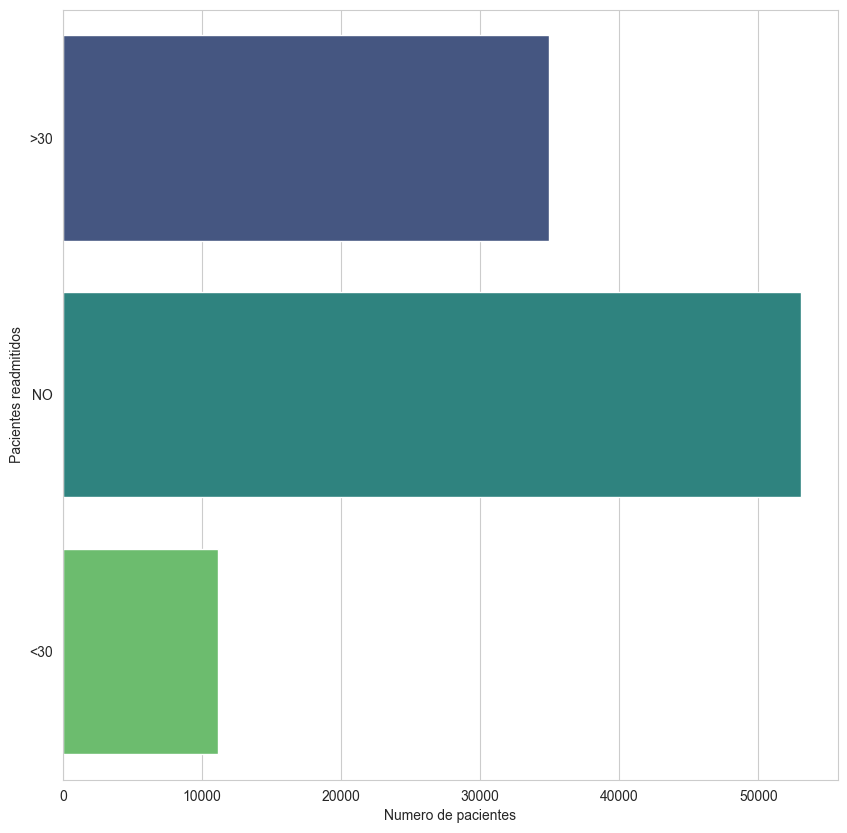

Porcentajes de cada variable: readmitted
NO     53.531910
>30    35.234368
<30    11.233722
Name: proportion, dtype: float64


In [51]:
# Graficaré para tener una representación visual de la distribución.
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") # Tema para todos los graficos.
plt.figure(figsize=(10,10))
sns.countplot(data['readmitted'], color='blue', palette='viridis')
plt.xlabel('Numero de pacientes')
plt.ylabel('Pacientes readmitidos')
plt.show()

readmitted_norm = data['readmitted'].value_counts(normalize=True)
print(f"Porcentajes de cada variable: {readmitted_norm*100}")

Se puede observar una distribución desbalanceada, con un sesgo hacia los pacientes que no fueron readmitidos.
- mayor 30:  esta variable la manejaremos como pacientes que no fueron readmitidos y representa el 35.3%.
- NO: Pacientes que no fueron readmitidos y representa el 53.3%.
- Menor a 30: Aquellos que fueron readmitidos y representa el 11.2%.

- Para este analisis voy a optar por una clasificacion binaria, simplificando las variables mayor a 30 y NO como pacientes que no fueron readmitido, de esta manera la clase minoritaria es los pacientes que fueron readmitdos.
- De este modo creare una nueva columna llamada target que sera la variable objetivo y la dividire en dos grupos:
- 0: Aquellos que fueron readmitidos (<30 )
- 1: Aquellos que no fueron readmitidos (>30) Dias y (NO)


In [52]:
mapping = {'<30': 1, '>30': 0, 'NO': 0}
data['target'] = data['readmitted'].map(mapping)

data['target'].value_counts()

target
0    88002
1    11137
Name: count, dtype: int64

In [53]:
data.info()
data_diag = data

data_diag.to_csv('../data/processed/data_diag.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 99139 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99139 non-null  object
 1   gender                    99139 non-null  object
 2   age                       99139 non-null  object
 3   admission_type_id         99139 non-null  int64 
 4   discharge_disposition_id  99139 non-null  int64 
 5   admission_source_id       99139 non-null  int64 
 6   time_in_hospital          99139 non-null  int64 
 7   num_lab_procedures        99139 non-null  int64 
 8   num_procedures            99139 non-null  int64 
 9   num_medications           99139 non-null  int64 
 10  number_outpatient         99139 non-null  int64 
 11  number_emergency          99139 non-null  int64 
 12  number_inpatient          99139 non-null  int64 
 13  diag_1                    99139 non-null  object
 14  diag_2                    

In [56]:
data.dropna(subset=['diag_3'], inplace=True)

data.info()

data_sin_diag = data

data_sin_diag.to_csv('../data/processed/data_sin_diag.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2                    